## Thoracic Outlet Syndrome abstracts pulled from PubMed and Google Scholar

Thoracic Outlet Syndrome (TOS) is explored via natural language processing (NLP) to determine if the source is a google scholar abstract/article available or a PubMed article/abstract.


In [1]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [4]:
reviews = pd.read_csv('ThoracicOutletSyndrome.csv', na_values='NaN',encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [5]:
reviews


,article,source
0,"Journal of Vascular Surgery\nVolume 46, Issue ...",GoogleScholar
1,Article\nJuly 1966\nThoracic Outlet Syndrome\...,GoogleScholar
2,"\nThoracic Outlet Syndrome\nJason H. Huang, M....",GoogleScholar
3,Thoracic outlet compression syndrome.\nAtasoy ...,GoogleScholar
4,"The American Journal of Surgery\nVolume 132, I...",GoogleScholar
5,Management of the Thoracic-Outlet Syndrome\nLi...,GoogleScholar
6,THORACIC OUTLET SYNDROMES\nAuthor links open o...,GoogleScholar
7,"Thoracic Outlet Syndrome: A Review\n\nSanders,...",GoogleScholar
8,Article\nMarch 1990\nThe Thoracic Outlet Synd...,GoogleScholar
9,"The Journal of Hand Surgery\nVolume 20, Issue ...",GoogleScholar


In [6]:
reviews = reviews.dropna()

In [7]:
reviews.shape

(46, 2)

In [8]:
reviews.columns = ['abstract','source']

In [9]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews)

                                             abstract         source
13  Thoracic outlet syndrome reconsidered.\nPoole ...  GoogleScholar
38  Two cases of brachial plexus compression secon...         PubMed
3   Thoracic outlet compression syndrome.\nAtasoy ...  GoogleScholar
32  A Novel Approach for Imaging of Thoracic Outle...         PubMed
30  The Safety of Blood Flow Restriction Training ...         PubMed
17  Management of thoracic outlet syndrome.\nW A D...  GoogleScholar
45  Percutaneous Costoclavicular Bypass for Thorac...         PubMed
44  The effects of head posture on nerve conductio...         PubMed
22  Robotic First Rib Resection for Thoracic Outle...         PubMed
18  \nTreatment for thoracic outlet syndrome\n\nCo...  GoogleScholar
14  Journal of Vascular Surgery\nVolume 49, Issue ...  GoogleScholar
19  Journal of Hand Therapy\nVolume 7, Issue 2, Ap...  GoogleScholar
40  Clinical, electrodiagnostic and imaging featur...         PubMed
5   Management of the Thoracic-Out

In [11]:


reviews['length'] = reviews['abstract'].map(lambda text: len(text))
print(reviews.head())



                                             abstract         source  length
13  Thoracic outlet syndrome reconsidered.\nPoole ...  GoogleScholar    2433
38  Two cases of brachial plexus compression secon...         PubMed    1421
3   Thoracic outlet compression syndrome.\nAtasoy ...  GoogleScholar     805
32  A Novel Approach for Imaging of Thoracic Outle...         PubMed    2711
30  The Safety of Blood Flow Restriction Training ...         PubMed    2996


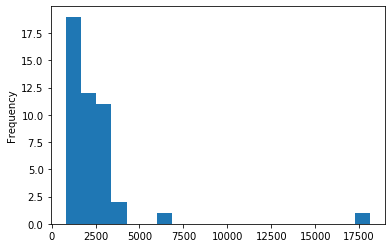

In [12]:
reviews.length.plot(bins=20, kind='hist') 

In [13]:
reviews.length.describe()

count       46.000000
mean      2534.760870
std       2589.622969
min        805.000000
25%       1451.250000
50%       2057.000000
75%       2716.250000
max      18129.000000
Name: length, dtype: float64

In [15]:
print(list(reviews.abstract[reviews.length > 3700].index)) 
print(list(reviews.source[reviews.length > 3700]))


[18, 14, 0, 42]
['GoogleScholar', 'GoogleScholar', 'GoogleScholar', 'PubMed']


Wall time: 219 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002345A5A2BE0>,
      dtype=object)

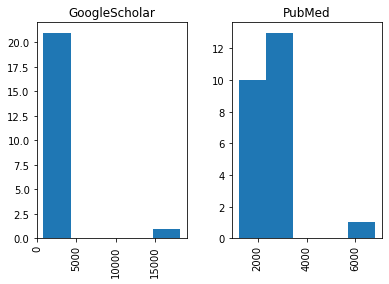

In [16]:
%%time
reviews.hist(column='length', by='source', bins=5)

In [17]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [18]:


reviews.abstract.head().apply(split_into_tokens)



13    [Thoracic, outlet, syndrome, reconsidered, Poo...
38    [Two, cases, of, brachial, plexus, compression...
3     [Thoracic, outlet, compression, syndrome, Atas...
32    [A, Novel, Approach, for, Imaging, of, Thoraci...
30    [The, Safety, of, Blood, Flow, Restriction, Tr...
Name: abstract, dtype: object

In [19]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [20]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [22]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.abstract.head().apply(split_into_lemmas)

13    [thoracic, outlet, syndrome, reconsidered, poo...
38    [two, case, brachial, plexus, compression, sec...
3     [thoracic, outlet, compression, syndrome, atas...
32    [novel, approach, imaging, thoracic, outlet, s...
30    [safety, blood, flow, restriction, training, t...
Name: abstract, dtype: object

In [23]:
%%time
# bag of words on the comments
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['abstract'])
print(len(bow_transformer.vocabulary_))


2974
Wall time: 734 ms


In [24]:
review4 = reviews['abstract'][4]
print(review4)

The American Journal of Surgery
Volume 132, Issue 6, December 1976, Pages 771-778
The American Journal of Surgery
Scientific paper
Congenital anomalies associated with thoracic outlet syndrome: Anatomy, symptoms, diagnosis, and treatment?
Author links open overlay panelDavid B.RoosMD
1
https://doi.org/10.1016/0002-9610(76)90456-6
Get rights and content
Abstract

Personal evaluation of more than 2,300 patients for possible thoracic outlet syndrome (TOS) and knowledge gained from 980 TOS operations in 766 patients (operative incidence of 33.7 per cent of the patients examined) have shown that most patients with TOS have anomalous fibrous muscular bands near the brachial plexus that predispose them to neurologic irritation or compression involving the plexus. Anatomic analysis during operations for TOS, plus cadaver dissections, have disclosed seven distinct types of fibromuscular bands in addition to the less frequent bony anomalies long associated with neurovascular compression. One thi

In [25]:
bow4 = bow_transformer.transform([review4])


In [26]:
%%time
reviews_bow = bow_transformer.transform(reviews['abstract'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (46, 2974)
number of non-zeros: 6755
sparsity: 4.94%
Wall time: 734 ms


In [27]:

#reviews was permutated earlier, so taking the order is random
# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:34]
reviews_bow_test = reviews_bow[34:]
reviews_sentiment_train = reviews['source'][:34]
reviews_sentiment_test = reviews['source'][34:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(34, 2974)
(12, 2974)


In [28]:
reviews_sentiment_test.unique()

array(['PubMed', 'GoogleScholar'], dtype=object)

In [29]:


%time 
review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 0 ns


In [30]:

print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.source[4])



predicted: GoogleScholar
expected: GoogleScholar


In [31]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['GoogleScholar' 'GoogleScholar' 'GoogleScholar' 'PubMed' 'GoogleScholar'
 'PubMed' 'PubMed' 'PubMed' 'GoogleScholar' 'GoogleScholar' 'PubMed'
 'GoogleScholar']


In [32]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')
print('Results alphabetized as GEO, PLOS, then PubMed for source results predicted and expected')

accuracy 0.8333333333333334
confusion matrix
 [[5 0]
 [2 5]]
(row=expected, col=predicted)
Results alphabetized as GEO, PLOS, then PubMed for source results predicted and expected


In [33]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

               precision    recall  f1-score   support

GoogleScholar       0.71      1.00      0.83         5
       PubMed       1.00      0.71      0.83         7

     accuracy                           0.83        12
    macro avg       0.86      0.86      0.83        12
 weighted avg       0.88      0.83      0.83        12



In [34]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=2), 
          '\n')

### Values returned alphabatized for Type: no, yes are values returned in the array order

In [35]:
print('Results alphabetized as GoogleScholar then PubMed:\n')
predict_review('in vivo. cell culture. growth.')

predict_review('radiating pain.')

predict_review('quality of life.')
predict_review('I don\'t like spaghetti.')

predict_review('samples derived. university research.')

Results alphabetized as GoogleScholar then PubMed:

in vivo. cell culture. growth. [[0.32 0.68]] 

radiating pain. [[0.93 0.07]] 

quality of life. [[0.82 0.18]] 

I don't like spaghetti. [[0.48 0.52]] 

samples derived. university research. [[0. 1.]] 



In [36]:
reviews.groupby('source').describe()

length                                                     \
               count         mean          std     min      25%     50%   
source                                                                    
GoogleScholar   22.0  2586.863636  3602.447016   805.0  1219.25  1501.0   
PubMed          24.0  2487.000000  1125.437809  1223.0  1676.75  2429.0   

                                 
                   75%      max  
source                           
GoogleScholar  2414.25  18129.0  
PubMed         2810.75   6813.0

If you get back the probabilities, it is because there weren't a bag of words generated or improperly set to the type
instead of the comments or reviews.

#### Evidence inspired articles/abstracts are mostly sourced to from PubMed instead of Google Scholar, but the symptoms are most likely sourced to Google Scholar articles for this subject